### Iris Flower Classification

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [208]:
#Read Data from CSV file
df = pd.read_csv("C:\\Users\\TATA UMESH\\Desktop\\Visual Studios\\BharatIntern\\IrisClassification.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [209]:
df.shape

(150, 5)

In [210]:
#Columns of the data set 
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [211]:
#The information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [212]:
#Description of the data frame (count, mean & standard deviation)
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.212000
std,0.828066,0.433594,1.764420,0.761306
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [213]:
#Finding correlation between columns
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.799861
sepal_width,-0.109369,1.000000,-0.420516,-0.355542
petal_length,0.871754,-0.420516,1.000000,0.942533
petal_width,0.799861,-0.355542,0.942533,1.000000


<AxesSubplot:>

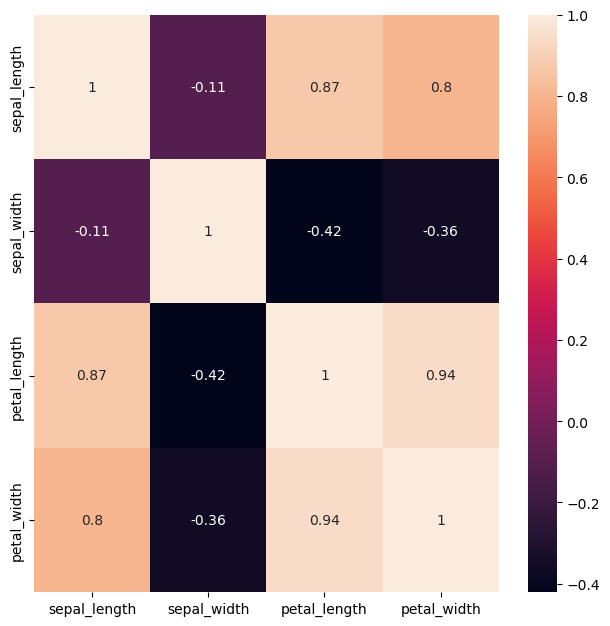

In [214]:
#Visualize the correlation using a heat map
plt.figure(figsize=(7.5,7.5), dpi=100)
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

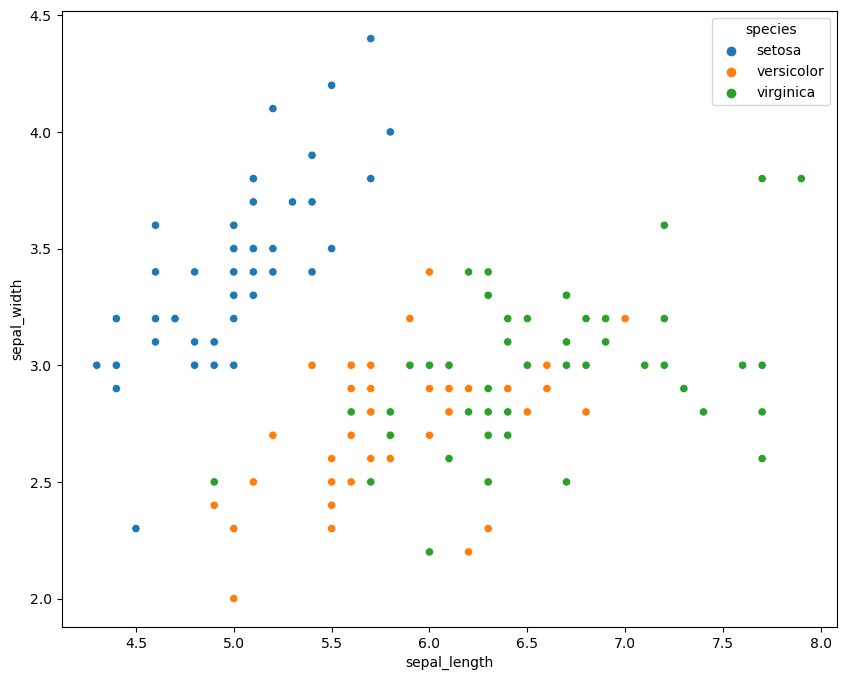

In [215]:
#Visualizing the relationship between sepal length and sepal width
plt.figure(figsize=(10,8), dpi=100)
sns.scatterplot(data=df, x=df['sepal_length'], y=df['sepal_width'], hue=df['species'])

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

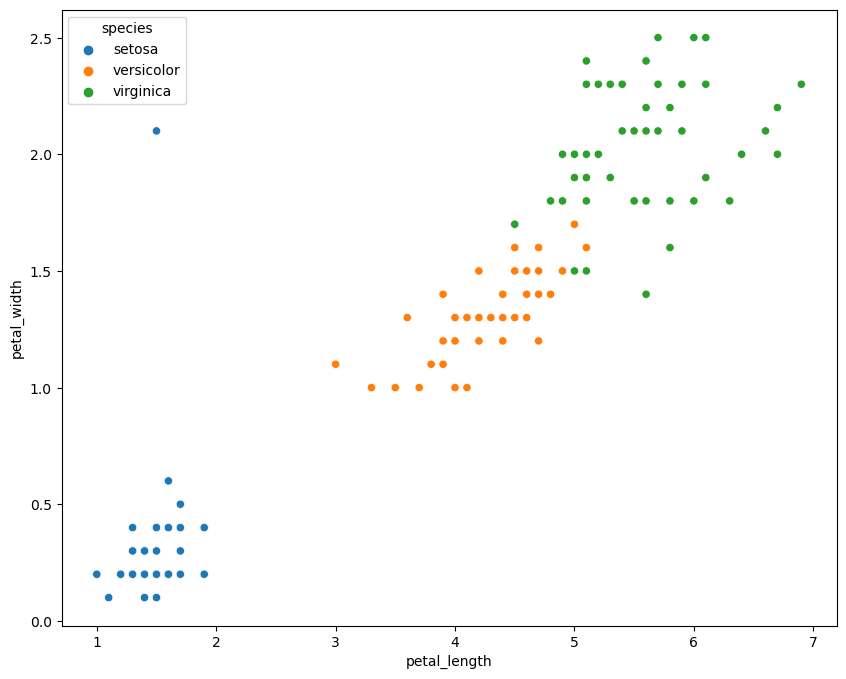

In [216]:
#Visualizing the relationship between petal length and petal width
plt.figure(figsize=(10,8), dpi=100)
sns.scatterplot(data=df, x=df['petal_length'], y=df['petal_width'], hue=df['species'])

<AxesSubplot:xlabel='species', ylabel='count'>

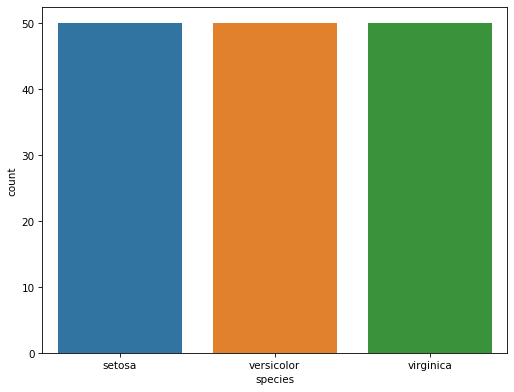

In [217]:
#Count of each species
plt.figure(figsize=(8,6), dpi = 75)
sns.countplot(data=df, x=df['species'])

In [218]:
#Data Preprocessing
#Checking the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [219]:
#Splitting the data set into Train Data and Test Data
from sklearn.model_selection import train_test_split

In [220]:
X = df.drop('species', axis=1)
y = df['species']

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [222]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [223]:
rf = RandomForestClassifier(n_estimators = 10, random_state=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=2)

In [224]:
y_pred = rf.predict(X_test)

In [225]:
y_pred

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica'], dtype=object)

In [226]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [227]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      0.88      0.88         8
   virginica       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



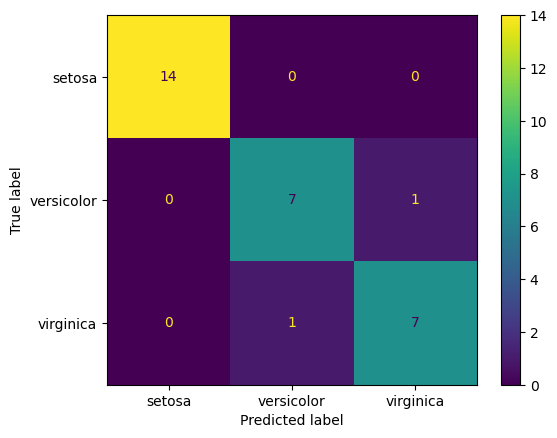

In [229]:
cf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
cf.plot()
plt.show()

In [230]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [231]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [232]:
y_pred = knn.predict(X_test)

In [233]:
y_pred

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica'], dtype=object)

In [234]:
accuracy_score(y_test, y_pred)

1.0

In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



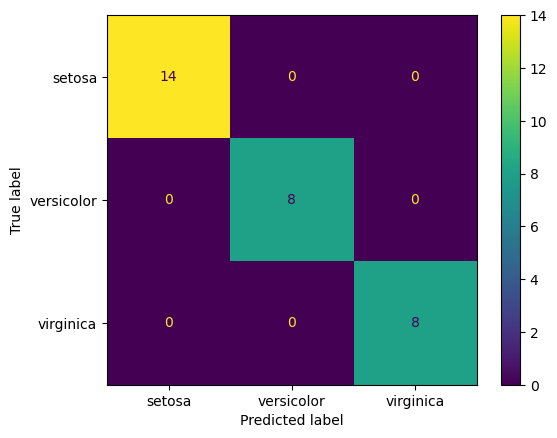

In [236]:
cf = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=rf.classes_)
cf.plot()
plt.show()